In [1]:
import string
from collections import defaultdict
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
import nltk
from scipy.spatial.distance import cosine
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline
pal = sns.color_palette()

In [2]:
df_train = pd.read_pickle("train_pp.pkl")
df_test = pd.read_pickle("test_pp.pkl")

In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_1,words_2,end_punc_1,end_punc_2,is_same_end_punc
145367,145367,229850,229851,Is there only one consciousness?,Is consciousness one for everyone?,1,"[is, there, only, one, consciousness, ?]","[is, consciousness, one, for, everyone, ?]",?,?,True
123169,123169,98309,199206,Which is a suitable solar panel installation p...,Which is a suitable solar panel installation p...,0,"[which, is, a, suitable, solar, panel, install...","[which, is, a, suitable, solar, panel, install...",?,?,True
57880,57880,101653,101654,Is there any idea for a new and useful mini pr...,Are there any new topics in computer science t...,0,"[is, there, any, idea, for, a, new, and, usefu...","[are, there, any, new, topic, in, computer, sc...",?,?,True
213043,213043,318261,318262,What does it mean if a girl cries after hurtin...,What does it mean if a girl cries without any ...,0,"[what, doe, it, mean, if, a, girl, cry, after,...","[what, doe, it, mean, if, a, girl, cry, withou...",?,?,True
204901,204901,307914,307915,What are some wholesale drop shippers that hav...,What portrait lenses are compatible with the C...,0,"[what, are, some, wholesale, drop, shipper, th...","[what, portrait, lens, are, compatible, with, ...",?,?,True


In [11]:
s1 = df_train.words_1.str.len()
s2 = df_train.words_2.str.len()
qlen_train = np.hstack([s1,s2])  
s1 = df_test.words_1.str.len()
s2 = df_test.words_2.str.len()
qlen_test = np.hstack([s1,s2])  

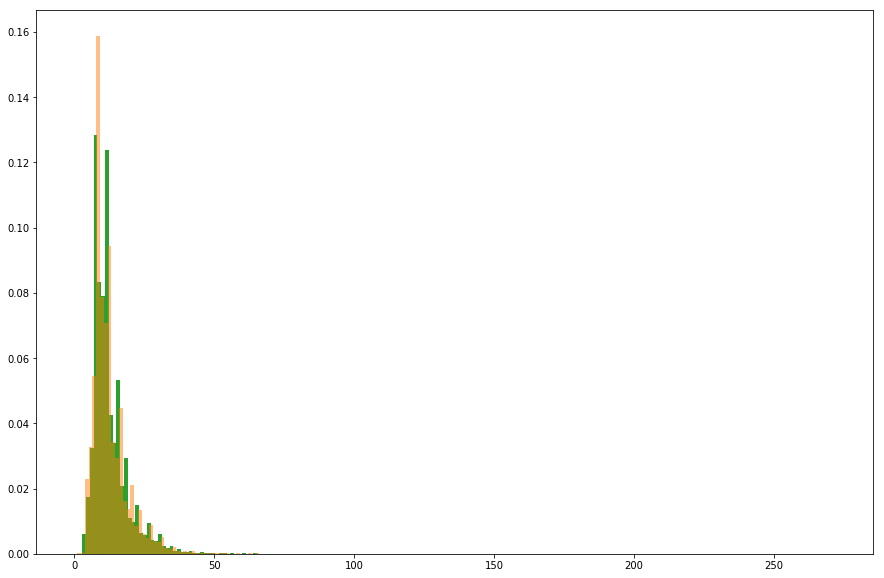

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(qlen_train, bins=200, color=pal[2], normed=True, label='train')
plt.hist(qlen_test, bins=200, color=pal[1], normed=True, alpha=0.5, label='test')
plt.show()